In [ ]:
!which python3

/usr/bin/python3


In [ ]:
import numpy as np
from sklearn.cluster import KMeans 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/ActorsDataset.csv', index_col=0)

In [ ]:
df.head()

Gender  Age  Net Worth, Millions $  Number of children                 Name
ID                                                                            
1    Male   78                    300                   5        Harrison Ford
2    Male   47                     50                   2  Neil Patrick Harris
3    Male   72                     16                   2         Jeremy Irons
4    Male   41                     10                   2          Oscar Isaac
5    Male   47                      7                   2       Patrick Wilson

In [ ]:
df

Gender  Age  ...  Number of children                 Name
ID                ...                                         
1      Male   78  ...                   5        Harrison Ford
2      Male   47  ...                   2  Neil Patrick Harris
3      Male   72  ...                   2         Jeremy Irons
4      Male   41  ...                   2          Oscar Isaac
5      Male   47  ...                   2       Patrick Wilson
..      ...  ...  ...                 ...                  ...
252  Female   85  ...                   5        Julie Andrews
253  Female   24  ...                   0     Hailee Steinfeld
254  Female   50  ...                   1       Minnie Driver 
255  Female   74  ...                   0        Liza Minnelli
256  Female   60  ...                   2       Julianne Moore

[256 rows x 5 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 1 to 256
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Gender                 256 non-null    object
 1   Age                    256 non-null    int64 
 2   Net Worth, Millions $  256 non-null    int64 
 3   Number of children     256 non-null    int64 
 4   Name                   256 non-null    object
dtypes: int64(3), object(2)
memory usage: 12.0+ KB


In [ ]:
df.describe()

Age  Net Worth, Millions $  Number of children
count  256.000000             256.000000          256.000000
mean    51.433594              79.718750            1.792969
std     15.213625              97.725942            1.531406
min     20.000000               3.000000            0.000000
25%     40.000000              16.000000            0.750000
50%     50.000000              40.000000            2.000000
75%     60.000000             100.000000            3.000000
max     90.000000             500.000000            9.000000

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


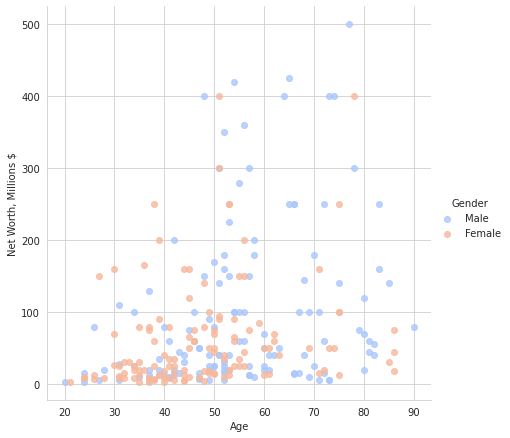

In [ ]:
sns.set_style('whitegrid')
sns.lmplot('Age','Net Worth, Millions $',data=df, hue='Gender',
           palette='coolwarm',height=6,aspect=1,fit_reg=False)

In [ ]:
df1 = df[['Age','Net Worth, Millions $','Gender','Number of children']]

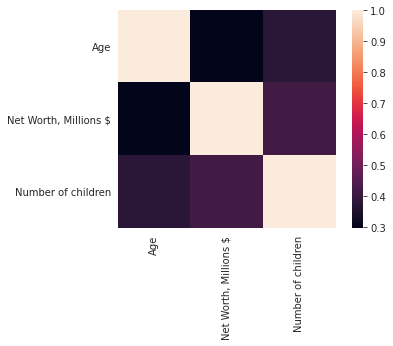

In [ ]:
cor = df1.corr() 
sns.heatmap(cor, square = True)

In [ ]:
X= df.iloc[:, [1,2]].values

In [ ]:
wcss = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    wcss.append(kmeanModel.inertia_)

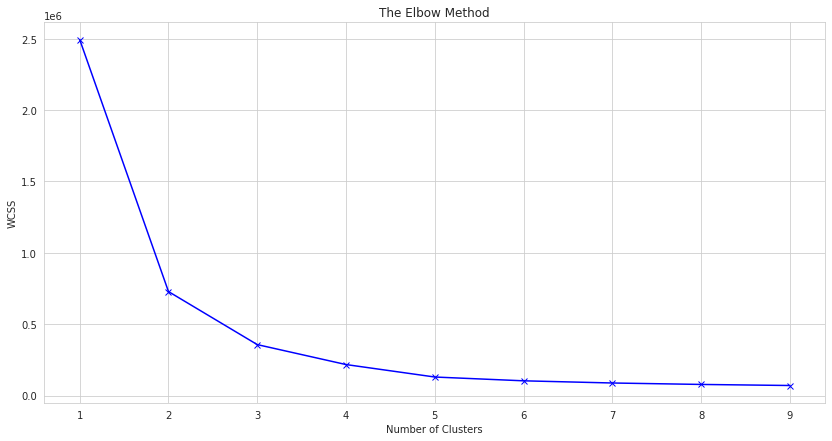

In [ ]:
plt.figure(figsize=(14,7))
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 3, init='k-means++', random_state=0)
pred_y= kmeans.fit_predict(X)

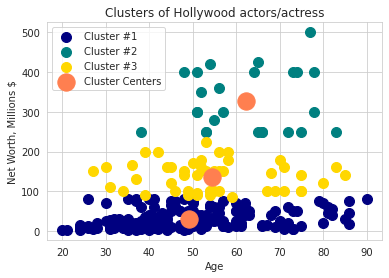

In [ ]:
plt.scatter(X[pred_y == 0, 0], X[pred_y == 0, 1], s = 100, c = 'navy', label = 'Cluster #1')
plt.scatter(X[pred_y == 1, 0], X[pred_y == 1, 1], s = 100, c = 'teal', label = 'Cluster #2')
plt.scatter(X[pred_y == 2, 0], X[pred_y == 2, 1], s = 100, c = 'gold', label = 'Cluster #3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'coral', label = 'Cluster Centers')
plt.title('Clusters of Hollywood actors/actress')
plt.xlabel('Age')
plt.ylabel('Net Worth, Millions $')
plt.legend()
plt.show()

In [ ]:
print(kmeans.labels_)

[1 0 0 0 0 1 2 0 0 0 2 0 0 0 2 0 0 0 2 2 2 2 1 0 0 0 1 0 0 2 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 2 2 0 1 0 0 0 0 0 0 0 0 1 0 0 2 0 2 1 0 0 0 0 1 2 0 0 0 0
 2 0 2 1 2 0 0 0 2 0 0 0 2 1 0 0 0 0 0 0 0 0 2 2 2 1 2 2 2 1 0 0 0 2 1 1 1
 0 1 0 0 0 2 2 1 0 0 0 0 0 1 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 1 1 2 2 2 0 1 0 2 0 2 2 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2 0 0 0 0 0 0]
